## IMDB MOVIE REVIEW

In [1]:
import keras
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
# 원래 단어를 알아보기 위한
word_index = imdb.get_word_index()
reverse_word_index = dict( [value, key] for(key, value) in word_index.items() )

#### 디코딩

In [7]:
decoded_review = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
type(reverse_word_index)

dict

#### enumerate 함수

In [9]:
for i, c in enumerate(['A', 'B', 'C'], start= 1):
    print(i, c)

1 A
2 B
3 C


#### 데이터를 준비

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences), dimension ))
    
    for i, sequence in enumerate(sequences):
        results[i ,sequence] = 1
    
    
    return results 

#### Data의 Encoding

In [11]:
x_train = vectorize_sequences(train_data)
x_trest = vectorize_sequences(test_data)

#### float type으로 변환

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

### Keras Model

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape= (10000, )))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1 , activation= 'sigmoid'))

In [14]:
model.compile(optimizer= 'rmsprop',
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs= 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)
                   )

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5412 - accuracy: 0.7853 - val_loss: 0.4210 - val_accuracy: 0.8689
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3390 - accuracy: 0.8992 - val_loss: 0.3283 - val_accuracy: 0.8818
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2461 - accuracy: 0.9234 - val_loss: 0.2850 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1915 - accuracy: 0.9386 - val_loss: 0.2817 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1566 - accuracy: 0.9497 - val_loss: 0.2879 - val_accuracy: 0.8833
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1282 - accuracy: 0.9605 - val_loss: 0.2883 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1071 - accuracy: 0.9686 - val_loss: 0.3069 - val_accuracy: 0.8816
Epoch 8/20
30

#### 실험 결과 데이터를 가져온다.

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

### 실험 결과를 시각화 한다.

#### LOSS

C:\Users\user\AppData\Local\Temp\ipykernel_9324\1992085569.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c= 'red')


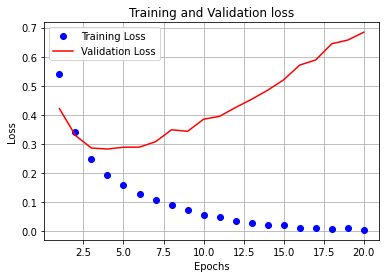

In [18]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss,     'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c= 'red')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid()

#### Accuracy

C:\Users\user\AppData\Local\Temp\ipykernel_9324\2803876683.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-',  label= 'Validation acc', c= 'red')


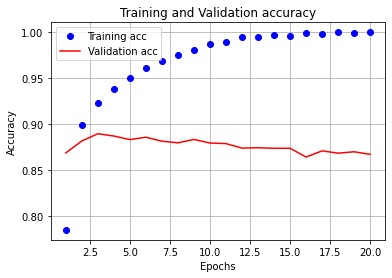

In [19]:
plt.plot(epochs, acc, 'bo',  label= 'Training acc')
plt.plot(epochs, val_acc, 'b-',  label= 'Validation acc', c= 'red')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

### 모델 초기화, epoch조절

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape= (10000, )))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1 , activation= 'sigmoid'))

In [28]:
from tensorflow.keras import optimizers

model.compile(optimizer= optimizers.RMSprop(lr= 0.001),
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs= 3,
                    batch_size = 512,
                    validation_data = (x_val, y_val)
                   )

Epoch 1/3
30/30 [==============================] - 2s 44ms/step - loss: 0.4938 - accuracy: 0.7922 - val_loss: 0.3639 - val_accuracy: 0.8696
Epoch 2/3
30/30 [==============================] - 0s 13ms/step - loss: 0.2853 - accuracy: 0.9047 - val_loss: 0.3082 - val_accuracy: 0.8810
Epoch 3/3
30/30 [==============================] - 0s 14ms/step - loss: 0.2113 - accuracy: 0.9294 - val_loss: 0.2808 - val_accuracy: 0.8875


In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#### Loss

C:\Users\user\AppData\Local\Temp\ipykernel_9324\2499279012.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c= 'red')


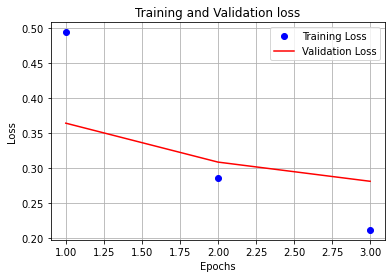

In [31]:
plt.plot(epochs, loss,     'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c= 'red')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid()

#### Accuracy

C:\Users\user\AppData\Local\Temp\ipykernel_9324\2803876683.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-',  label= 'Validation acc', c= 'red')


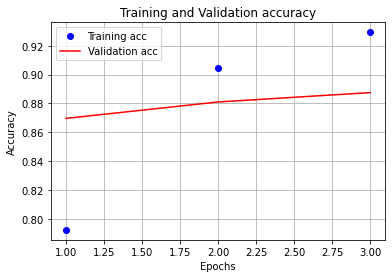

In [32]:
plt.plot(epochs, acc, 'bo',  label= 'Training acc')
plt.plot(epochs, val_acc, 'b-',  label= 'Validation acc', c= 'red')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()